In [1]:
import numpy as np 
import pandas as pd 
import pandas_datareader as web 
from scipy.stats import norm 
import matplotlib.pyplot as plt
import datetime 
plt.rcParams["figure.figsize"] = (10,8)

## Question 1

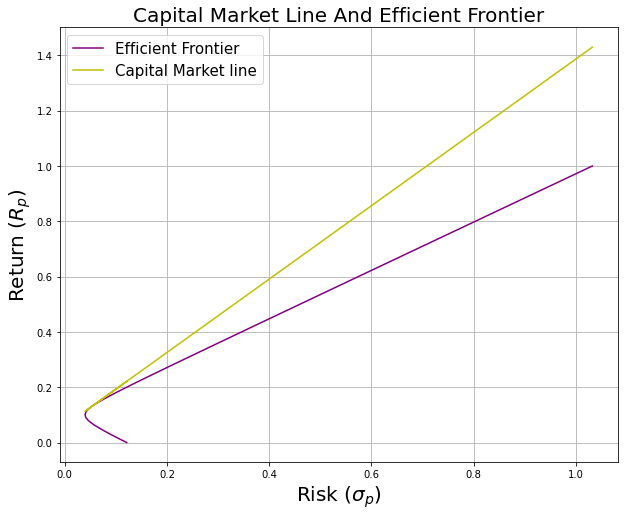

In [2]:
def fina(a,b,N):
    R_bar = np.linspace(a,b,N)
    sigma = np.zeros(len(R_bar))
    for i in range(0,len(R_bar)):
        sigma[i] = 0.0025 * np.sqrt((210000*R_bar[i]**(2) - 42000*R_bar[i] + 2356 ))
    return R_bar, sigma

a = 0
b = 1
N = 100
R_bar, sigma = fina(a,b,N)

# Finding the Capital Market Line
CML = 1.3273676 * sigma + 0.06


plt.plot(sigma, R_bar, 'purple')
plt.plot(sigma,CML, 'y')
plt.grid("True")
plt.title("Capital Market Line And Efficient Frontier", fontsize = 20)
plt.xlabel("Risk $(\sigma_p)$",fontsize = 20)
plt.ylabel("Return $(R_p)$", fontsize = 20)
plt.legend(['Efficient Frontier','Capital Market line'], fontsize = 15)
plt.savefig('FM1')
plt.show()

## Question 4

In [3]:
ci = 0.95 # 95% confidence internal
I = 1000  # investment of $1000 in Netflix

def VAR(I, ci, mu, sigma):
    prob = norm.ppf(1-ci, mu, sigma)
    return I - I*(prob + 1)

Data = web.DataReader("NFLX", "yahoo", start = '2017/1/1', end = '2020/1/1')
Data1 = Data["Adj Close"].pct_change()

mu = np.mean(Data1)
sigma = np.std(Data1)

VaR = VAR(I, ci, mu, sigma)
print("Mean: %0.4f" %mu)
print("Variance: %0.3f" %sigma)
print ("Value at Risk: $%0.2f" % VaR)

Mean: 0.0015
Variance: 0.023
Value at Risk: $36.88
